# Dragon Real Estate-Prize Predictor

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("data4.csv")

In [3]:
housing.dropna(subset=['RM'], inplace=True)

In [4]:
housing.dropna(axis=1,inplace=True)

In [5]:
housing = housing.reset_index(drop=True)

In [6]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0    CRIM       501 non-null    float64
 1   ZN          501 non-null    float64
 2    INDUS      501 non-null    float64
 3   CHAS        501 non-null    int64  
 4   NOX         501 non-null    float64
 5   RM          501 non-null    float64
 6   AGE         501 non-null    float64
 7   DIS         501 non-null    float64
 8   RAD         501 non-null    int64  
 9   TAX         501 non-null    int64  
 10   PTRATIO    501 non-null    float64
 11   B          501 non-null    float64
 12   LSTAT      501 non-null    float64
 13   MEDV       501 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 54.9 KB


In [8]:
housing['CHAS'].value_counts()

CHAS
0    466
1     35
Name: count, dtype: int64

In [9]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,1.730851,11.362275,11.177285,0.069860,0.555217,6.285577,68.621956,3.789483,9.596806,408.944112,18.456287,356.286866,12.665729,22.515170
std,2.662636,23.373831,6.879982,0.255166,0.116282,0.705197,28.146632,2.111182,8.737569,169.168900,2.159617,91.667238,7.155422,9.229226
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081870,0.000000,5.190000,0.000000,0.449000,5.887000,45.100000,2.088200,4.000000,279.000000,17.400000,375.210000,7.010000,16.800000
50%,0.251990,0.000000,9.690000,0.000000,0.538000,6.209000,77.700000,3.182700,5.000000,330.000000,19.000000,391.340000,11.380000,21.200000
75%,2.368620,12.500000,18.100000,0.000000,0.624000,6.625000,94.000000,5.118000,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
# %matplotlib inline

In [11]:
# import matplotlib.pyplot as plt

In [12]:
# housing.hist(bins=50 , figsize=(20,15))

# Train-Test Splitting

In [13]:
#for leaning purpose
# import numpy as np

# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size = int(len(data)*test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices] ,  data.iloc[test_indices] 

In [14]:
# train_set , test_set = split_train_test(housing , 0.2)

In [15]:
# print(f"Raws in train set : {len(train_set)}\nRaws in test set: {len(test_set)}\n" )

In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [17]:
print(f"Raws in train set : {len(train_set)}\nRaws in test set: {len(test_set)}\n" )

Raws in train set : 400
Raws in test set: 101



In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [19]:
strat_train_set['CHAS'].value_counts()

CHAS
0    372
1     28
Name: count, dtype: int64

In [20]:
# 95/7

In [21]:
# 376/28

In [22]:
housing = strat_train_set.copy()

# Looking For correlations

In [23]:
corr_matrix = housing.corr()

In [24]:
corr_matrix[' MEDV'].sort_values(ascending=False)

 MEDV         1.000000
RM            0.706237
ZN            0.342460
 B            0.335222
DIS           0.219108
CHAS          0.202094
 CRIM        -0.331379
AGE          -0.347537
RAD          -0.359551
NOX          -0.405827
TAX          -0.445225
 INDUS       -0.452683
 PTRATIO     -0.490143
 LSTAT       -0.736765
Name:  MEDV, dtype: float64

array([[<Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel=' MEDV', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel=' LSTAT', ylabel='RM'>],
       [<Axes: xlabel='RM', ylabel=' MEDV'>,
        <Axes: xlabel=' MEDV', ylabel=' MEDV'>,
        <Axes: xlabel='ZN', ylabel=' MEDV'>,
        <Axes: xlabel=' LSTAT', ylabel=' MEDV'>],
       [<Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel=' MEDV', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel=' LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='RM', ylabel=' LSTAT'>,
        <Axes: xlabel=' MEDV', ylabel=' LSTAT'>,
        <Axes: xlabel='ZN', ylabel=' LSTAT'>,
        <Axes: xlabel=' LSTAT', ylabel=' LSTAT'>]], dtype=object)

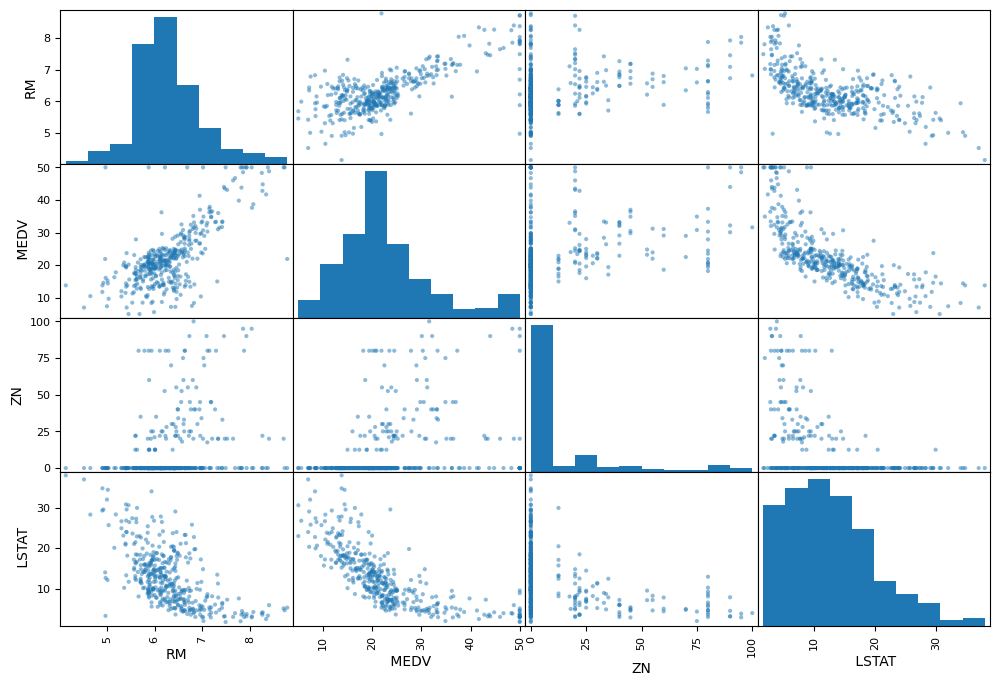

In [25]:
from pandas.plotting import scatter_matrix
attributes = ['RM', ' MEDV', 'ZN',' LSTAT']
scatter_matrix(housing[attributes],  figsize = (12,8))

In [26]:
print(housing.columns) #to see the names of the columns

Index([' CRIM', 'ZN', ' INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', ' PTRATIO  ', ' B', ' LSTAT', ' MEDV'],
      dtype='object')


<Axes: xlabel='RM', ylabel=' MEDV'>

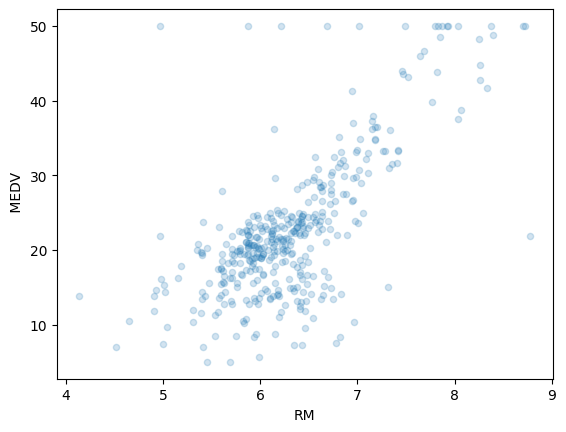

In [27]:
housing.plot(kind="scatter", x='RM', y=' MEDV',alpha= 0.2)

# Trying Out Attribute Combination

In [28]:
housing['TAXRM']= housing['TAX']/housing['RM']

In [29]:
housing['TAXRM']

15      51.252087
302     29.919137
123     33.493675
220     37.140092
469    122.719735
          ...    
216     44.166307
457    105.429793
61      41.999408
376    101.757066
359     75.854214
Name: TAXRM, Length: 400, dtype: float64

In [30]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
15,0.78420,0.0,8.14,0,0.538,5.990,81.7,4.2579,4,307,21.0,386.75,14.67,17.5,51.252087
302,0.07503,33.0,2.18,0,0.472,7.420,71.9,3.0992,7,222,18.4,396.90,6.47,33.4,29.919137
123,0.38735,0.0,25.65,0,0.581,5.613,95.6,1.7572,2,188,19.1,359.29,27.26,15.7,33.493675
220,0.31533,0.0,6.20,0,0.504,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8,37.140092
469,8.05579,0.0,18.10,0,0.584,5.427,95.4,2.4298,24,666,20.2,352.58,18.14,13.8,122.719735


In [31]:
corr_matrix = housing.corr()
corr_matrix[' MEDV'].sort_values(ascending=False)

 MEDV         1.000000
RM            0.706237
ZN            0.342460
 B            0.335222
DIS           0.219108
CHAS          0.202094
 CRIM        -0.331379
AGE          -0.347537
RAD          -0.359551
NOX          -0.405827
TAX          -0.445225
 INDUS       -0.452683
 PTRATIO     -0.490143
TAXRM        -0.531902
 LSTAT       -0.736765
Name:  MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel=' MEDV'>

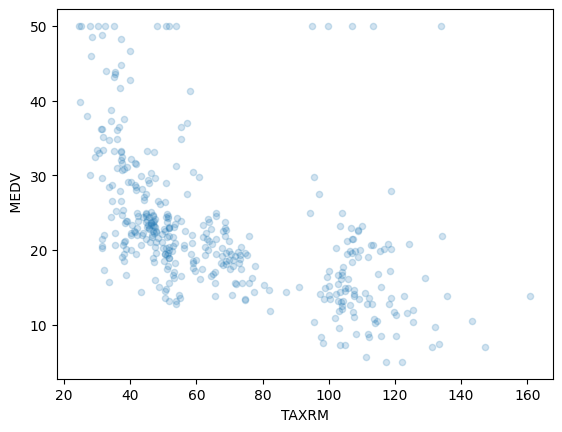

In [32]:
housing.plot(kind="scatter", x='TAXRM', y=' MEDV',alpha= 0.2)

In [33]:
housing = strat_train_set.drop(' MEDV' , axis=1)
housing_labels = strat_train_set[' MEDV'].copy()

# Missing Attributes

In [34]:
# To take care of missing data ,you have three options:
#     1.Get rid of the missing data points ...cannot remove data points if they were so much
#     2.Get rid of the whole attribute .....cannot remove rm as it is important
#     3.set the value to some value(0,mean or median)....this is the only option

In [35]:
# a=housing.dropna(subset=['RM']) #option 1
# a.shape
#Note that the original housing dataframe will remain unchanged


In [36]:
housing.drop('RM',axis=1).shape #option 2
#Note that the original housing dataframe will remain unchanged

(400, 12)

In [37]:
median = housing["RM"].median #option 3

In [38]:
housing['RM'].fillna(median)
#note that the original will remain unchanged

15     5.990
302    7.420
123    5.613
220    8.266
469    5.427
       ...  
216    6.951
457    6.317
61     6.762
376    6.545
359    8.780
Name: RM, Length: 400, dtype: float64

In [39]:
housing.shape

(400, 13)

In [40]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1.750448,10.460000,11.366800,0.070000,0.558980,6.305620,68.952250,3.759230,9.720000,411.605000,18.497250,354.095550,12.726100
std,2.626672,22.258076,6.806869,0.255467,0.118738,0.687595,28.224529,2.090139,8.806275,168.913256,2.121478,93.971145,7.138033
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.088282,0.000000,5.320000,0.000000,0.452000,5.887750,45.800000,2.087875,4.000000,281.000000,17.400000,374.527500,7.187500
50%,0.274475,0.000000,9.900000,0.000000,0.538000,6.213500,78.750000,3.142300,5.000000,332.000000,19.050000,390.660000,11.655000
75%,2.396888,3.125000,18.100000,0.000000,0.631000,6.629250,93.900000,5.116700,24.000000,666.000000,20.200000,396.007500,16.992500
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [41]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [42]:
imputer.statistics_


array([2.74475e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21350e+00, 7.87500e+01, 3.14230e+00, 5.00000e+00, 3.32000e+02,
       1.90500e+01, 3.90660e+02, 1.16550e+01])

In [43]:
x= imputer.transform(housing)

In [44]:
housing_tr= pd.DataFrame(x,columns= housing.columns)

In [45]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1.750448,10.460000,11.366800,0.070000,0.558980,6.305620,68.952250,3.759230,9.720000,411.605000,18.497250,354.095550,12.726100
std,2.626672,22.258076,6.806869,0.255467,0.118738,0.687595,28.224529,2.090139,8.806275,168.913256,2.121478,93.971145,7.138033
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.088282,0.000000,5.320000,0.000000,0.452000,5.887750,45.800000,2.087875,4.000000,281.000000,17.400000,374.527500,7.187500
50%,0.274475,0.000000,9.900000,0.000000,0.538000,6.213500,78.750000,3.142300,5.000000,332.000000,19.050000,390.660000,11.655000
75%,2.396888,3.125000,18.100000,0.000000,0.631000,6.629250,93.900000,5.116700,24.000000,666.000000,20.200000,396.007500,16.992500
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Scikit-Learn Design

Primarily ,three types of objects:
1.Estimators:- It estimates some parameter based on dataset.eg imputer
2.Transformers
3.Predictors


# Creating a Pipeline

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    #..add as many as you want inn ur pipeline
    ('std_scalar',StandardScaler()),
    
    
    
    
    
    
])

In [47]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [48]:
housing_num_tr

array([[-0.36832087, -0.47053031, -0.47464423, ...,  1.18119738,
         0.34792962,  0.27267098],
       [-0.63864697,  1.01393435, -1.35132688, ..., -0.04589809,
         0.45607677, -0.87754355],
       [-0.51959477, -0.47053031,  2.1009788 , ...,  0.28447377,
         0.0553463 ,  2.0386711 ],
       ...,
       [-0.6190273 ,  0.65406413, -0.91739838, ...,  0.56764965,
         0.44201231, -0.45252526],
       [ 1.57199521, -0.47053031,  0.99041605, ...,  0.80362954,
         0.45607677,  1.1718021 ],
       [ 0.65710161, -0.47053031,  0.99041605, ...,  0.80362954,
         0.00484212, -1.04306223]])

# Selecting a Desired Model for Dragon Real Estate


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = DecisionTreeRegressor()
# model = LinearRegression()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [50]:
some_data =housing.iloc[:5]

In [51]:
some_labels = housing_labels.iloc[:5]

In [52]:
prepared_data = my_pipeline.transform(some_data)

In [53]:
model.predict(prepared_data)

array([17.974, 33.536, 16.02 , 45.137, 14.004])

In [54]:
list(some_labels)

[17.5, 33.4, 15.7, 44.8, 13.8]

In [55]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [56]:
rmse

1.24702506490447

using better evaluation techinque-cross validation

In [57]:

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Assuming housing_num_tr and housing_labels are preprocessed feature and label data

# Instantiate the LinearRegression model
model = LinearRegression()

# Perform cross-validation and obtain scores
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)

# Calculate RMSE scores
rmse_scores = np.sqrt(-scores)


In [58]:
rmse_scores

array([4.11071298, 4.7515808 , 5.43941371, 3.76954298, 6.28527156,
       4.41830732, 6.84616224, 3.70795204, 4.50713575, 6.29732418])

In [59]:
def print_scores(scores):
    print("scores:", scores)
    print("Mean:",scores.mean())
    print("Standards deviation: ",scores.std())

In [60]:
print_scores(rmse_scores)

scores: [4.11071298 4.7515808  5.43941371 3.76954298 6.28527156 4.41830732
 6.84616224 3.70795204 4.50713575 6.29732418]
Mean: 5.0133403558576095
Standards deviation:  1.0747944100703337


In [61]:
#convert this pipeline into a python python file and run it using vs code

# Saving the model

In [62]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 


['Dragon.joblib']

# Testing the model

In [64]:
import numpy as np
from sklearn.metrics import mean_squared_error

x_test = strat_test_set.drop(' MEDV', axis=1)
y_test = strat_test_set[' MEDV'].copy()
x_test_prepared = my_pipeline.transform(x_test)
model.fit(x_test_prepared, y_test)
final_prediction = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)
print(final_prediction, list(y_test))

[33.86442263 26.15717615 26.0015372  29.95357703 25.70742244 21.73180243
  6.18477928 24.39952649 22.99826136 21.58120611 36.04593997 26.89836366
 25.73698748 37.02652848 29.80145369 20.13530487 10.33097232 31.06135378
 18.1752908  21.80999779 17.38370804 28.5434534  18.08610193 14.33926308
 25.73515877 22.52855165 22.8127911  21.79804505 20.07137438 31.59937583
 29.1750819  17.08153885 22.67446345 18.13155319 28.3268579  13.55699318
 20.42371904 21.89562581 15.24260298 30.48587373 32.41754002 14.56258694
 22.62825648 32.37438734 12.55593191  8.48040728 32.38223499 18.97944072
 26.0822146  15.37548552 20.66312374 28.62841958 15.07089187 14.82786611
 20.12142832 32.59831311 38.20491773 27.43907158 31.40040863 22.13324297
 12.89280742 26.41680103 20.34937492 21.31584333  8.00345345 17.22284158
 15.19509648 25.50977728  7.78725916 28.89606048 14.13094502 31.45214676
 17.36834313 21.78590104 22.44130994 13.93294772 11.16948808 20.60212948
 25.18282937  4.83695446 32.34194271 29.79153533 12

In [65]:
final_rmse

3.805032302010206